# Spam Detection using Naive Bayes Classifier

## Introduction

This project aims to build a **spam detection system** using the **Naive Bayes** machine learning algorithm. The task is to classify email messages as either **spam** or **ham** (not spam), based on their content.

### Dataset Description

- The dataset `spam.csv` contains **5,172** email messages.
- The first column indicates the **label**: `spam` or `ham`.
- The remaining column(s) contain the **text of the email message**.
- This dataset was gotten from Kaggle.

### Objectives

- Load and explore the dataset.
- Clean and preprocess the text data (tokenization, removing stopwords, etc.).
- Convert text data to numerical form using **TF-IDF** or **CountVectorizer**.
- Train and evaluate a **Naive Bayes classifier**.
- Optionally compare with other models or extend with deep learning.

### Why Naive Bayes?

Naive Bayes is a popular algorithm for spam filtering due to:
- Its **simplicity and efficiency** on large text datasets.
- Its ability to perform well even with relatively small amounts of training data.
- The **independence assumption** (though “naive”) often works well for high-dimensional inputs like text.

---



In [39]:
# Import pandas library
import pandas as pd 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [40]:
# Load the dataset
# Display the first few rows of the dataset
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
# Group data by 'Category' and display descriptive statistics
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [42]:
# Create a new column 'spam' based on the 'Category' column
df['spam']=df.Category.apply(lambda x: 1 if x =='spam' else 0)

In [43]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df.Message,df.spam,test_size=0.2)

In [44]:
# Convert text data into numerical format using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
# Train a Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [46]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)


array([0, 1])

In [47]:
# Create a pipeline for text classification
from sklearn.pipeline import Pipeline
pipeline= Pipeline([('CountVectorizer',CountVectorizer()),
                    ('classifier',MultinomialNB())
                   ])

In [48]:
# Train the pipeline
pipeline.fit(X_train,y_train)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [49]:
# Make predictions using the pipeline
y_pred=pipeline.predict(X_test)

In [50]:
# Evaluate the pipeline
pipeline.score(X_test,y_test)

0.9820627802690582

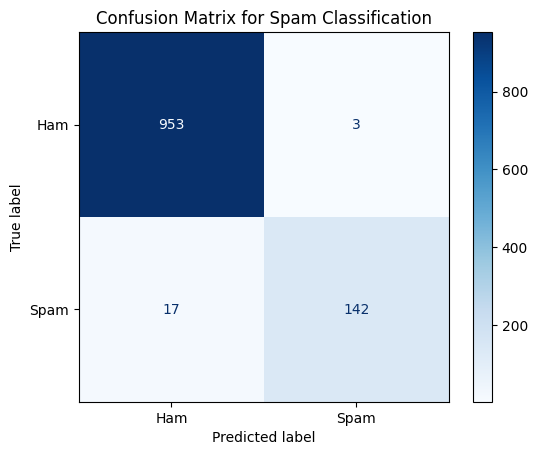

In [52]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Spam Classification")
plt.show()

## Conclusion

The Naive Bayes classifier demonstrated strong performance in distinguishing between spam and ham messages in this dataset. Based on the confusion matrix:

- A high number of **ham messages** were correctly classified (True Negatives).
- Most **spam messages** were also correctly identified (True Positives).
- A relatively small number of **false positives** occurred, where legitimate emails were misclassified as spam.
- A few **false negatives** were present, where spam slipped through as ham.

### Key Takeaways:
- **Naive Bayes is a lightweight and effective model** for text classification tasks like spam detection.
- The model’s simplicity and speed make it ideal for large-scale, real-time email filtering.
- However, minimizing **false positives** is crucial in real-world applications to avoid filtering out legitimate emails.

### Potential Improvements:
- Use **TF-IDF vectorization** for more nuanced feature representation.
- Try other models like **Logistic Regression**, **SVM**, or **Deep Learning (LSTM/BERT)**.
- Implement techniques like **cross-validation** or **ensemble methods** to boost performance.

Overall, Naive Bayes provides a solid baseline and performs well on this dataset.
